# Welcome to Covid19 Data Analysis Notebook
------------------------------------------

### Let's Import the modules 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


## Task 2 

# Task 2.1: importing covid19 dataset
importing "Covid19_Confirmed_dataset.csv" from "./Dataset" folder. 


In [2]:
covid_ds_csv = pd.read_csv("Datasets/covid19_Confirmed_dataset.csv")
covid_ds_csv.head()  #display the first 5 rows

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


#### Let's check the shape of the dataframe
Check the number of rows and columns

In [3]:
covid_ds_csv.shape  #Display number of rows an dcolumns in a tuple

(266, 104)

### Task 2.2: Delete the useless columns

In [4]:
#Remove the columns related to location, set the axis=1 to remove the columns, the default value for axis=0 which removes the rows
#This method returns a copy of dataframe, if we set another parameter "inplace=True", it will affect the main dataset iwth new changes
#covid_ds_csv.drop(["Lat","Long"], axis=1, inplace=True)
df = covid_ds_csv.drop(["Lat","Long"], axis=1)
df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


### Task 2.3: Aggregating the rows by the country

We need data for each country not for provinces, so we need to aggregate all off the rows of all countries or regions

In [5]:
# use the method "groupby()" and then aggregation method "Sum()" to sum up all the rows for the column
df_aggregated = df.groupby("Country/Region").sum()

In [6]:
df_aggregated.head()

#After aggregation the index of the data is  name of Country/Region

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [7]:
df_aggregated.shape

#Now we can easily access to the data of each country be its name

(187, 100)

### Task 2.4: Visualizing data related to a country for example China
visualization always helps for better understanding of our data.

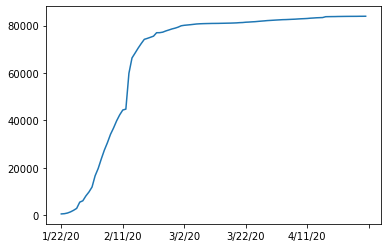

In [8]:
#Showing the data for "China", it returns pandas series
#df_aggregated.loc["China"]
df_aggregated.loc["China"].plot()

#We can see the cumulative number of cases related to China
#This plot shows data from 22th of Jan to 30th of Apr

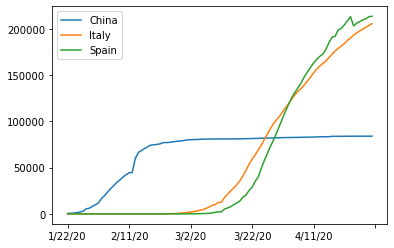

In [9]:
#Compare the cumulative number of confirmed cases in China, Italy and Spain
df_aggregated.loc["China"].plot()
df_aggregated.loc["Italy"].plot()
df_aggregated.loc["Spain"].plot()
plt.legend() 

### Task3: Calculating a good measure 
we need to find a good measure reperestend as a number, describing the spread of the virus in a country. 

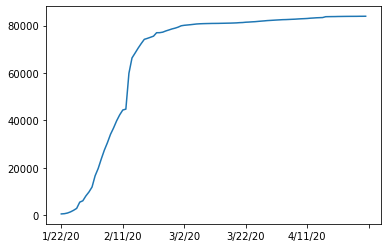

In [10]:
df_aggregated.loc['China'].plot()

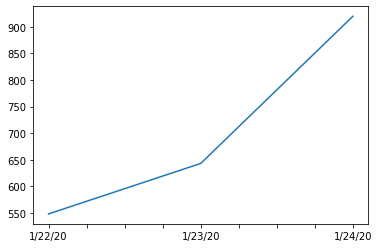

In [11]:
#show the data for the time period of first three days for China
df_aggregated.loc["China"][:3].plot()  #Rows from the begining to the third row (not including the 3rd row)

We can see that in the 22th of January there is 550 cases and 24 hours lated it reached to 650 cases, which mean during the next day 100 cases infected. 
Also as we can see in 24th of JAnuary the number of cases is 900 and we can see a growth number of infected cases during another 24 hours  by 250.

Here we want to find a measure to describe the spread of virus in this period of time:
The spread of the virus is the average number of new confirmed cases or we can say the maximum number of new cases.

First we consider the maximum number of new infected cases/ virus spread.
To find the rate of this curve, we calculate the first derivative of this curve.

### task 3.1: caculating the first derivative of the curve

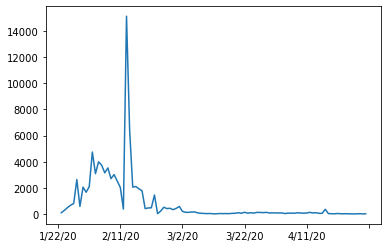

In [12]:
df_aggregated.loc["China"].diff().plot()

### task 3.2: find maxmimum infection rate for China

This plot shows us the change in infection rate day by day in our period which we are looking for the maximum that is the peack of the graph. To calculate this peak we use max() after diff().
This number tells us that in one day /24 hours - 15136 new cases have been intected 

In [13]:
df_aggregated.loc["China"].diff().max()

15136.0

In [14]:
#Calculate for Itay
df_aggregated.loc["Italy"].diff().max()

6557.0

In [15]:
#The maximum number of infected cases in one day for Spain
df_aggregated.loc["Spain"].diff().max()

9630.0

### Task 3.3: find maximum infection rate for all of the countries. 

In [16]:
countries = list(df_aggregated.index)
max_infection_rates = []  # an empty list for max number
for c in countries:
    max_infection_rates.append(df_aggregated.loc[c].diff().max()) #it returns a number so we can append it directly

#max_infection_rates

# Add this list as a new column to the dataframe

df_aggregated["max_infected_rate"] = max_infection_rates
df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infected_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


### Task 3.4: create a new dataframe with only needed column 

In [17]:
covid_data = pd.DataFrame(df_aggregated["max_infected_rate"])

In [18]:
covid_data.head()

,max_infected_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


### Task4: 
- Importing the WorldHappinessReport.csv dataset
- selecting needed columns for our analysis 
- join the datasets 
- calculate the correlations as the result of our analysis

### Task 4.1 : importing the dataset

In [19]:
df_happiness_rep_csv = pd.read_csv("Datasets/worldwide_happiness_report.csv")

In [20]:
df_happiness_rep_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Task 4.2: let's drop the useless columns 

In [21]:
#Make a list of columns that we want to drop
drop_col = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]

In [22]:
df_happines = df_happiness_rep_csv.drop(drop_col, axis=1)
df_happines.head() # now we have the life factors related to countries

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


### Task 4.3: changing the indices of the dataframe

In [23]:
df_happines.set_index("Country or region", inplace=True)

In [24]:
df_happines.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


### Task4.4: now let's join two dataset we have prepared  

#### Corona Dataset :

In [25]:
covid_data

,max_infected_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
...,...
West Bank and Gaza,66.0
Western Sahara,4.0
Yemen,5.0


In [26]:
covid_data.shape  #Shape is a property of datafram so it is not callable

(187, 1)

#### wolrd happiness report Dataset :

In [27]:
df_happines.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [28]:
df_happines.shape

(156, 4)

Since the number of row in covid_data is more than the other dataset, it is better to use the "inner join"

In [29]:
joint_data = covid_data.join(df_happines, how="inner")
joint_data.head()


,max_infected_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### Task 4.5: correlation matrix 

we want to see if there is any correlation betwene the "max rate of infection" and the life factors. to do so we need a correlation matrix

In [30]:
joint_data.corr()

,max_infected_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infected_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


The corr() method gives us a correltaion matrix which consists of correlation coefficients of every two columns in our dataset. as this value gets higher, the correlation between the two variable it higher. From the matrix above we can wee there is positive correltion between all life factors and max rate of infection

### Task 5: Visualization of the results
our Analysis is not finished unless we visualize the results in terms figures and graphs so that everyone can understand what you get out of our analysis

In [31]:
joint_data.head()

,max_infected_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### Task 5.1: Plotting GDP vs maximum Infection rate

GDP per capita on x-axis and max infection rate on y-axis

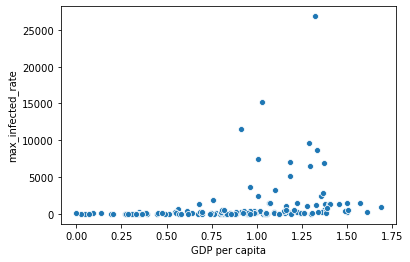

In [32]:
x = joint_data["GDP per capita"]
y = joint_data["max_infected_rate"]
sns.scatterplot(x,y)

The graph shows us as GDP grows the number of max infection also growing. However, it does not give us enough data which is because of scale difference between variables.
the y axis the range of values are between 0 to 25000 but xaxis is from 0 to 1.75. to solve this proble we use the "log scaling"

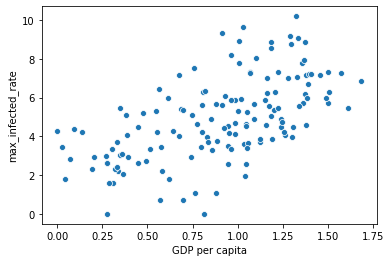

In [33]:
sns.scatterplot(x,np.log(y))  #it change the range of y values to 0 to 10

Now we cna see more detain in our graph, as the slope shows there is acorrelation betwene two variables whcih as GDP increased the max number of infected case also increased.

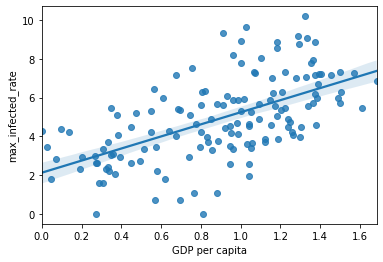

In [34]:
# the reg plot will fit the curve into the dataset
sns.regplot(x,np.log(y))

Now we have a fitted line which gives us a better visualization of the relation between two varibales. it shows a positive slope between these two variables

In [35]:
#GDP per capita	Social support	Healthy life expectancy	Freedom to make life choices





The intersting results from this analysis:
results who that people who are living in developed countries are more prone to getting infection of corona with compared of less developed countries.
We do the same analysis on the deaths dataset to see whether the lacing of the test kit hasany influence on the results

### Task 5.2: Plotting Social support vs maximum Infection rate

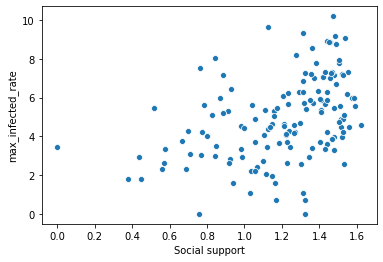

In [36]:
social_support = joint_data["Social support"]
sns.scatterplot(social_support, np.log(y))

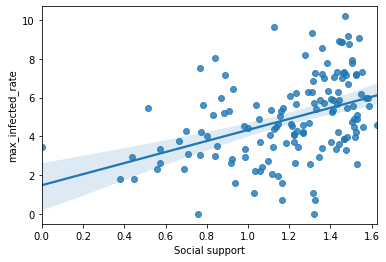

In [37]:
sns.regplot(social_support, np.log(y))

### Task 5.3: Plotting Healthy life expectancy vs maximum Infection rate

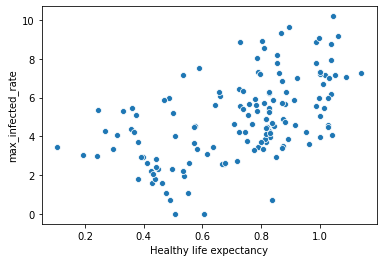

In [38]:
health_life_exp=joint_data["Healthy life expectancy"]
sns.scatterplot(health_life_exp,np.log(y))

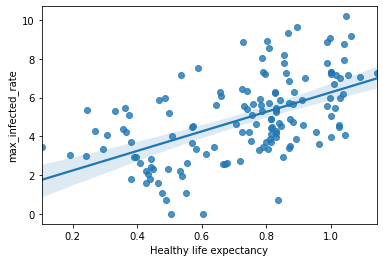

In [39]:
sns.regplot(health_life_exp,np.log(y))

### Task 5.4: Plotting Freedom to make life choices vs maximum Infection rate

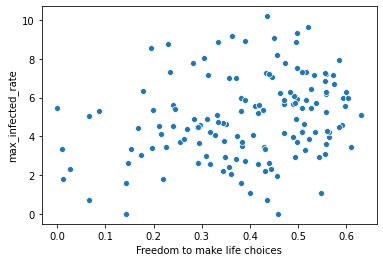

In [40]:
free_choice=joint_data["Freedom to make life choices"]
sns.scatterplot(free_choice,np.log(y))

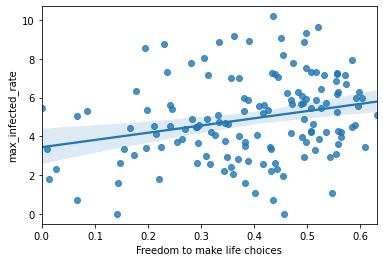

In [41]:
sns.regplot(free_choice,np.log(y))